In [1]:
# Start writing code here...

In [2]:
df_1 = _deepnote_execute_sql('SELECT *\nFROM \'cars.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [3]:
import pandas as pd
df = pd.read_csv('cars.csv')

# 1.Measures of central tendency

In [4]:
df['price_usd'].mean()

6639.971021255613

In [5]:
df['price_usd'].median()

4800.0

<AxesSubplot: ylabel='Frequency'>

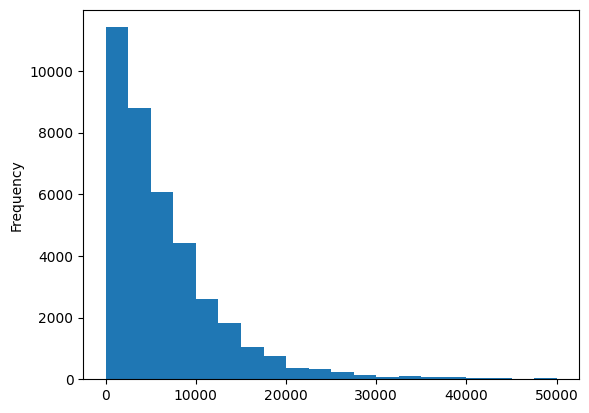

In [6]:
df['price_usd'].plot.hist(bins=20)

## 1.1. import library seaborn

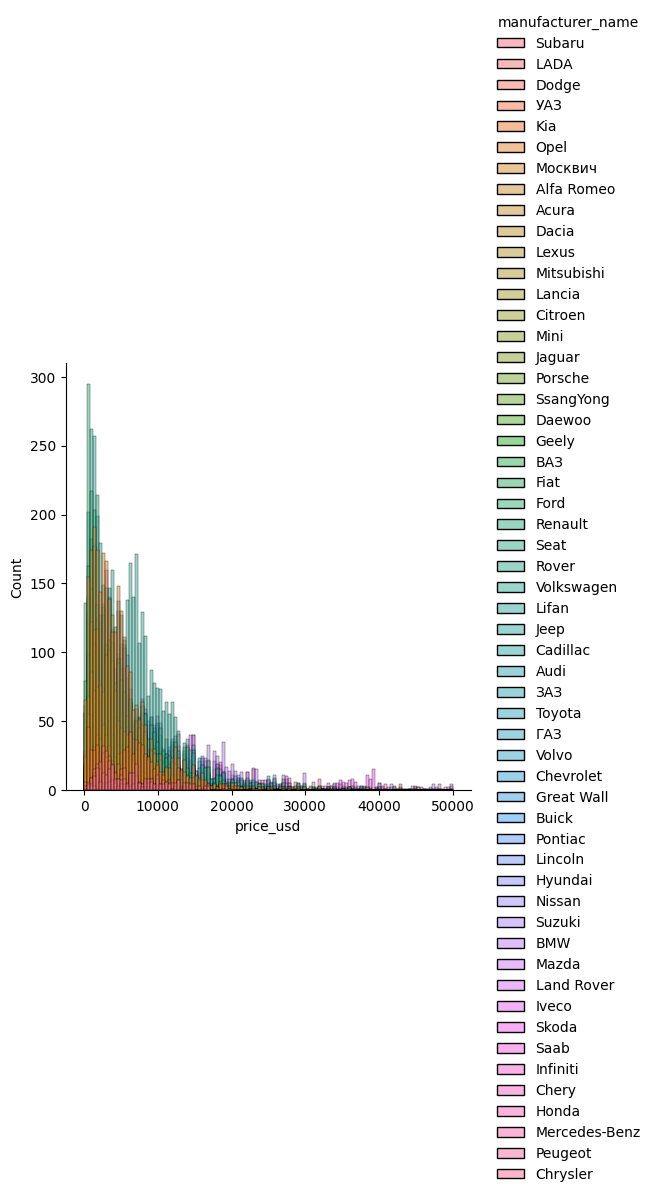

In [7]:
import seaborn as sns

sns.displot(df, x ='price_usd', hue = 'manufacturer_name')

## 1.2. group by engine_type

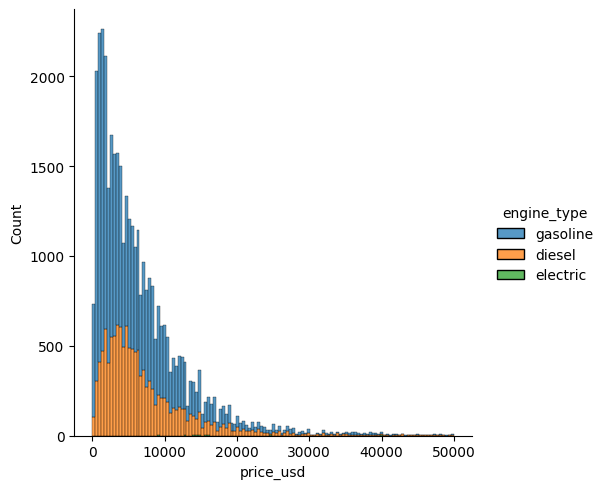

In [8]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack')

In [9]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


## 1.3. individual analysis of the audi q7 model

<AxesSubplot: xlabel='price_usd', ylabel='Count'>

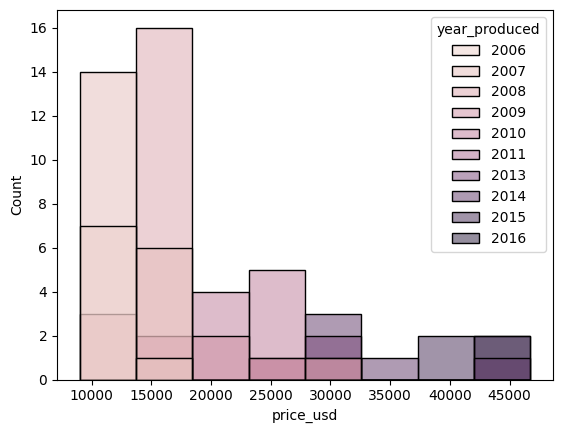

In [10]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name'] == 'Q7')]
sns.histplot(Q7_df, x='price_usd', hue='year_produced')

# 2.Measures of dispersion

add the matplotlib library

## 2.1. Measures of dispersion

In [11]:
import matplotlib.pyplot as plt

In [12]:
# standard deviation
df['price_usd'].std()

6428.1520182029035

In [13]:
#range
range=df['price_usd'].max() - df['price_usd'].min()
range

49999.0

In [14]:
# quartiles
median = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val =df['price_usd'].quantile(q=0)
max_val =df['price_usd'].quantile(q=1)
print(min_val, Q1, Q3, max_val)

1.0 2100.0 8990.0 50000.0


In [15]:
iqr = Q3 - Q1
iqr

6890.0

## 2.1. outlier identification

In [16]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 - 1.5*iqr
print(minlimit, maxlimit)

-8235.0 -1345.0


<AxesSubplot: xlabel='price_usd', ylabel='Count'>

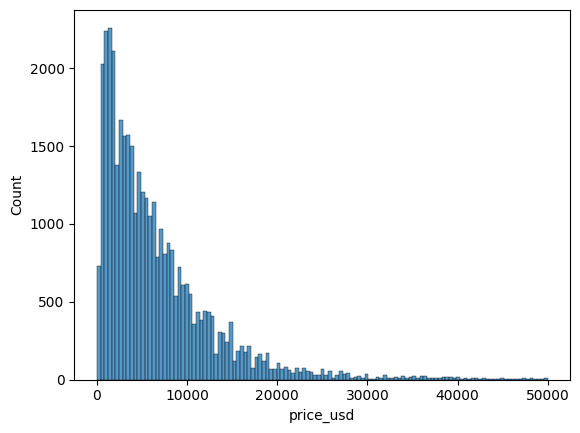

In [17]:
sns.histplot(df['price_usd'])

<AxesSubplot: ylabel='price_usd'>

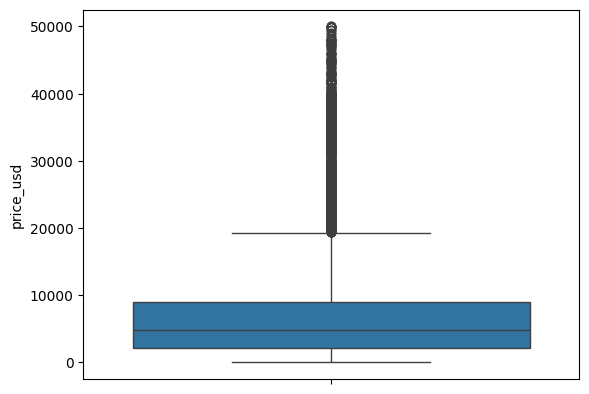

In [18]:
sns.boxplot(df['price_usd'])

<AxesSubplot: xlabel='engine_fuel', ylabel='price_usd'>

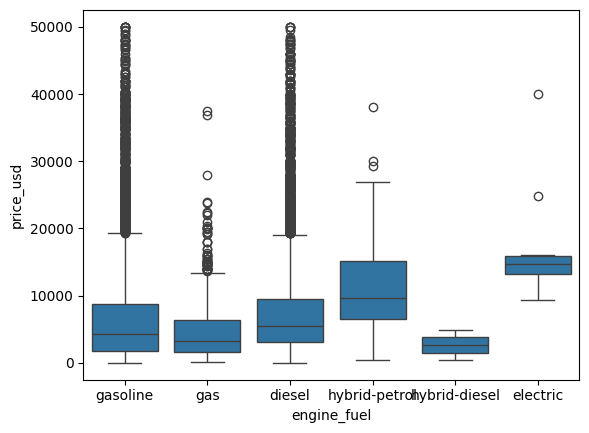

In [19]:
sns.boxplot(x='engine_fuel', y= 'price_usd', data = df)

# 3. data scaling 'dataset cars'

In [20]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y =datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

## 3.1 linear transformation

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

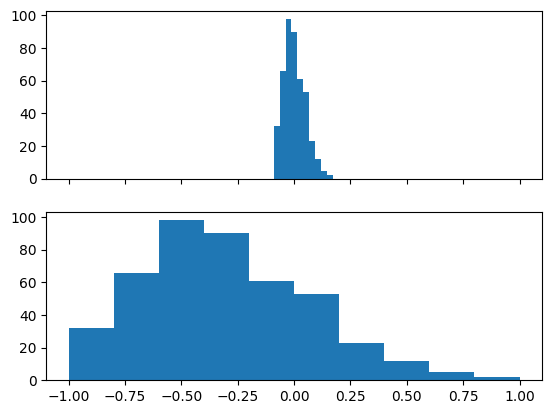

In [21]:
# escalation rules
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw) / (max_raw - min_raw)

fig, axs = plt.subplots(2, 1, sharex= True)

axs[0].hist(raw)
axs[1].hist(scaled)

In [22]:
# models for training

def train_raw():
    linear_model.LinearRegression().fit(raw,y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled,y)


In [23]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
print('train raw : {}'.format(raw_time))
print('train scaled : {}'.format(scaled_time))

train raw : 0.09121395400143228
train scaled : 0.060321687000396196


## 3.2 nonlinear transformation

In [24]:
df= pd.read_csv('cars.csv')

<AxesSubplot: >

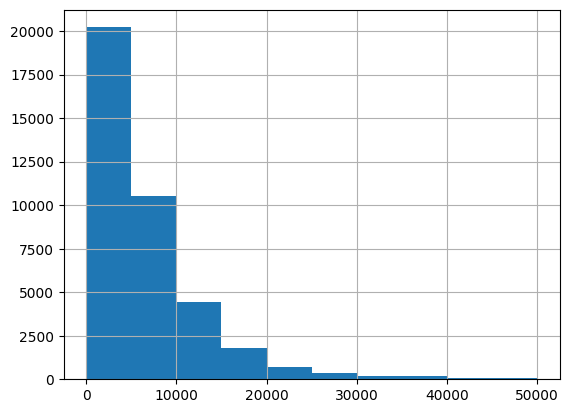

In [25]:
df.price_usd.hist()

<AxesSubplot: >

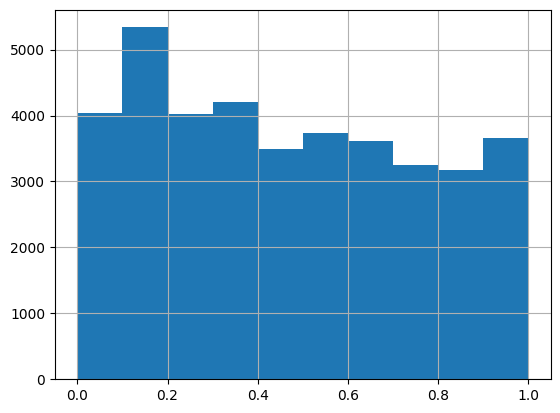

In [26]:
p= 10000
df.price_usd.apply(lambda x:np.tanh(x/p)).hist()

# 4. processing categorical variables

In [27]:
import pandas as pd

df=pd.read_csv('cars.csv')

In [28]:
#dummies
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
38526,False,False,True
38527,True,False,False
38528,False,False,True
38529,False,False,True


In [29]:
import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

## 4.2. categorical to numeric

In [30]:
encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [31]:
encoder.transform([['gasoline'],['diesel'], ['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

## 4.1. numeric to categorical

In [32]:
encoder.fit(df[['year_produced']].values)

OneHotEncoder(handle_unknown='ignore')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9567e5fe-0a13-469f-88f9-71ae7fa91806' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>